<center><h1> Project 1 - Images + Videos </h1></center>

In this project, we will guide you through the basics of working with images and videos. When you start analyzing body poses later in the course, all the input data will be in the form of images and videos. Therefore, through this first project, you will hopefully become more comfortable with generating & modifying images/videos via Python. 

## Objective
* Learn how to use matplotlib module
* Learn the basics of importing and saving files  
* Learn how to modify images + videos

## Table of Content:
1. What is Matplotlib
2. Import Images
3. Analyze Images
3. Import Videos
4. Analyze Videos

## 1. What is Matplotlib?

 [Matplotlib](https://matplotlib.org/) is a library for creating static, animated, and interactive visualizations in Python. There are many libraries out there (e.g. Plotly, Seaborn, Bokeh), and each have their own pros and cons. However, Matplotlib is the most general plotting library that is both flexible and easy to implement. Usually, people start by plotting their data with Matplotlib to get a better sense of the data they are working with. Here, we will be using images and videos as our data to visualize how they are formatted.

#### 1.1 Import Matplotlib
Matplotlib is one of many packages you downloaded with Anaconda, so you do not have to separately install it from the internet. Similar to how we previously imported ```numpy```, you can import ```matplotlib``` below.

In [1]:
import matplotlib
import matplotlib.pyplot as plt

#### 1.1 Create your first plot
To create a line plot, you can use ```plt.plot``` function. As we discussed in our previous project, Python is an object oriented language (i.e. everything is an object). So here, we imported an object called plt, which contains a function called plot. Plot takes multiple arguments, but it requires that you at least enter data as the first argument (or, in some cases, the first two arguments). You may be wondering, how do i know this? You can find out everything you need to know about a library and the functions that it contains simply by searching through its documentation. I would highly recommend you read through matplotlib's [documentation](https://matplotlib.org/contents.html) and [user guide](https://matplotlib.org/tutorials/index.html) so that using this library becomes almost second nature. You can also learn more about a library by using the ```? {library}``` command as shown below.

In [2]:
# ? plt
? plt.plot

In [3]:
import numpy as np

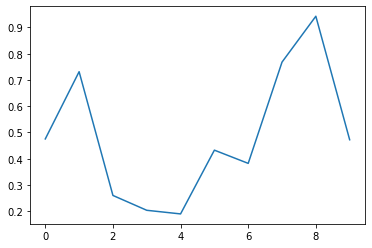

In [7]:
# creates random data
x = np.arange(10)
y = np.random.rand(10)

# plots your 10 data points
plt.plot(x, y)
plt.show()

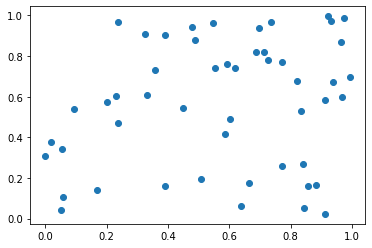

In [8]:
# you can also create scatter plots!
x = np.random.rand(50)
y = np.random.rand(50)

plt.scatter(x, y)
plt.show()

## 2. Import images

Now that you know how to visualize data, let's import image data and see if we can visualize images as well. We have provided you with one image of cells that we can look over together.

#### 2.1 Image to matrix
To import the image, we will use matplotlib again, but this time the image object. The image object (i.e. ```mpimg```) contains many functions, one of which is imread. This function reads an image by converting it into a 3D matrix.

In [10]:
import matplotlib.image as mpimg 

# ? mpimg
? mpimg.imread

In [16]:
data_path = "img/cells.png"
img = mpimg.imread(data_path)
print(f"Image Shape: {img.shape}")

Image Shape: (1182, 1182, 3)


In [17]:
print(img)

[[[0.06666667 0.         0.00784314]
  [0.0627451  0.         0.00392157]
  [0.05490196 0.         0.00392157]
  ...
  [0.         0.01176471 0.00392157]
  [0.         0.00784314 0.00392157]
  [0.         0.00784314 0.00392157]]

 [[0.12941177 0.         0.00784314]
  [0.1254902  0.         0.00784314]
  [0.11764706 0.         0.00392157]
  ...
  [0.         0.01568628 0.00392157]
  [0.         0.01960784 0.00784314]
  [0.         0.01960784 0.00784314]]

 [[0.47843137 0.00392157 0.00392157]
  [0.4627451  0.00392157 0.00392157]
  [0.43529412 0.00392157 0.00392157]
  ...
  [0.00784314 0.03529412 0.00392157]
  [0.01176471 0.06666667 0.00392157]
  [0.00784314 0.09019608 0.00392157]]

 ...

 [[0.05098039 0.         0.16078432]
  [0.05490196 0.         0.16470589]
  [0.07058824 0.         0.16078432]
  ...
  [0.         0.09803922 0.5058824 ]
  [0.         0.07843138 0.57254905]
  [0.         0.06666667 0.60784316]]

 [[0.07843138 0.         0.14117648]
  [0.08235294 0.         0.14509805]


#### 2.1 Plot the image matrix
We can already see two things from the matrix.

1. The image size is 1182 x 1182 x 3. The first two numbers are the width and height of the image. The third number corresponds to the color channel (i.e RGB - Red, Green, Blue)
2. Each entry is a float that ranges from a value of [0,1]. The higher the number, the more color of that channel is represented for a given pixel. The sum of all three colors from each RGB channel yields your final pixel color.

<img src="img/img_matrix.png" width="400">

All in all, an image is just a 3-D matrix. In it, each each pixel gets 3 numbers: a value for red, a value for green, and a value for blue. Sometimes, these numbers will be integers rather than floats. In this case, each element in the array would range from [0,255]. Below, I will show you that both [0,1] float and [0,255] int ranges are the same when we plot the image data via matplotlib

Range [0.0, 1.0]


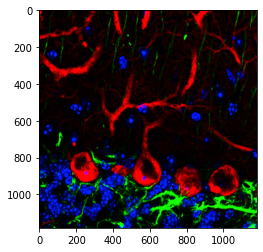

In [18]:
print(f"Range [{np.min(img)}, {np.max(img)}]")
plt.imshow(img)
plt.show()

Range [0, 255]


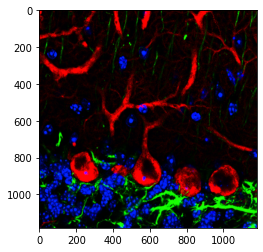

In [19]:
# Converts img with float range [0,1] to img with int range [0,255]
img_255 = img*255
img_255 = img_255.astype(int)

# prints img_255
print(f"Range [{np.min(img_255)}, {np.max(img_255)}]")
plt.imshow(img_255)

## 3. Analyze Images

Now that you know what image data looks like and how to visualize it using matplotlib, we will try to modify the data. This will give you a better sense of the image data and allow you to analyze things in a new way.

#### 3.1 I only want red cells...
As you can see from the image, we are working with fluorescent cells marked with either red, green, or blue (how convenient). There may be a time where you are interested in only looking at a specific type of cell, for example, the red cells. Given your understanding of the the image data, how do you think we might do this? Well, you know that each pixel has three color channels (Red, Green, and Blue). So, if you want to see cells that are only red, you can modify all the pixels in the image so that their green and blue color channels are set to zero. This way, only the pixels that contain red will show color. There are multiple ways of doing this, but below is one of the easiest/fastest. It utilizes the power of numpy arrays.

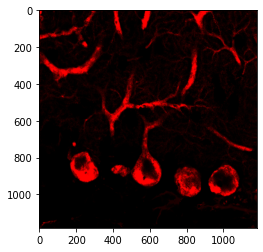

In [20]:
# creates a copy of img data to a new variable
img_red = np.copy(img)

# sets all values in green and blue color channels to 0
img_red[:,:,1:] = 0

# prints img_red
plt.imshow(img_read)

## 3. Import Videos

Now that you have mastered images, let's look at videos. You probably already know that videos are just sequence of images, and you now know that images are just 3D matrices. Given this, what do you think the video data will look like?

#### 3.1 Importing video data with skvideo

Unfortunately, matplotlib does not have a function to read videos. Therefore, we will use a separate library called skvideo to read our video into a matrix

In [24]:
import skvideo.io  

In [37]:
video_path = "video/CellDivision.mp4"
video = skvideo.io.vread(video_path)
print(video.shape)

(360, 360, 3)


#### 3.2 Visualizing one frame of the video

As you can see, a video is a 4D matrix. The first dimension is the frames, and the last three dimensions are similar to an image (i.e. width, heigh, RGB_channel). Given this, we can easily look at the image for specific frame by simply indexing into the 4D matrix as shown below.

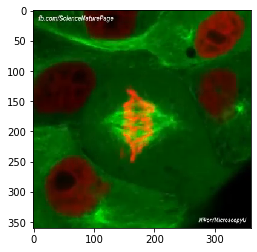

In [ ]:
fr = 100
plt.imshow(video[fr,:,:,:])
plt.show()

## 4. Analyze Videos

As you can see from the image of the video, we have a cell undergoing mitosis. The red marker show where the DNA is located, and the green marker shows the overall cell structure.

#### 4.1 Where is the DNA?

Similar to the image, let's filter out all the green and blue from the video so that we only have the red markers. 

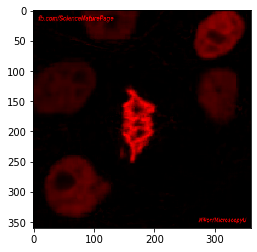

In [ ]:
# makes a copy of the video
video_red = np.copy(video)

# sets color all values in the green and blue color channels to zero, leaving only red in the matrix
video_red[:,:,:,1:] = 0

# prints frame 100 of the video
fr = 100
plt.imshow(video_red[fr,:,:,:])
plt.show()

<hr>
<strong>Created By:</strong> Dong Hur, Souvik Mandal, Jonah Brenner
<center><h1>Reference</h1></center>